# Titanic: Who will survive

<center><strong>Project Pipeline</strong></center>
<center><img src="images/Pipeline.jpg"width="500"/></center>

## Importing Libraries & Dataset

In [24]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
full_data =pd.read_csv('Data/train.csv')
#data_test=pd.read_csv('Data/test.csv')
print(full_data.info())
full_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis & Preprocessing

In [26]:
# counting Null values 
print('Train Null values:\n{}'.format(full_data.isnull().sum()))
print('-'*20)

# print('Val/Test Null values:\n{}'.format(data_test.isnull().sum()))
# print('-'*20)


Train Null values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------


In [27]:
# Drop all Duplicated Values
full_data.drop_duplicates(inplace=True)
# data_test.drop_duplicates(inplace=True)
# staistic description 
full_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [28]:
## Handling Null Values 

print(full_data.isnull().sum())
full_data=full_data.drop(['Cabin'],axis=1)
full_data['Age'].fillna(full_data['Age'].median(),inplace=True)
full_data.dropna(subset=['Embarked'],inplace=True)
print('-'*20)
print(full_data.isnull().sum())
full_data.info()
# X.fillna(method = 'ffill', inplace = True)
# y.fillna(method = 'ffill', inplace = True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       

C:\Users\modme\AppData\Local\Temp\ipykernel_2872\3376412396.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data['Age'].fillna(full_data['Age'].median(),inplace=True)


In [29]:
#spereate X & y 
y=full_data['Survived']
X=full_data.iloc[:,2:]

In [30]:
from sklearn.model_selection import train_test_split
data_train,data_test,data_train_y,data_test_y=train_test_split(X,y,stratify=y,test_size=0.1)
data_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
36,3,"Mamee, Mr. Hanna",male,28.0,0,0,2677,7.2292,C
75,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
737,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C
294,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,S
298,1,"Saalfeld, Mr. Adolphe",male,28.0,0,0,19988,30.5000,S


### 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

In [31]:
# complteting : filling or dropping missing values 
# for not repeating same operation on both train and test data set -> create list contain both datasets
drop_column=['Ticket','Name']
data_train.drop(drop_column,axis=1,inplace=True)
data_test.drop(drop_column,axis=1,inplace=True)
data_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
36,3,male,28.0,0,0,7.2292,C
75,3,male,25.0,0,0,7.6500,S
737,1,male,35.0,0,0,512.3292,C


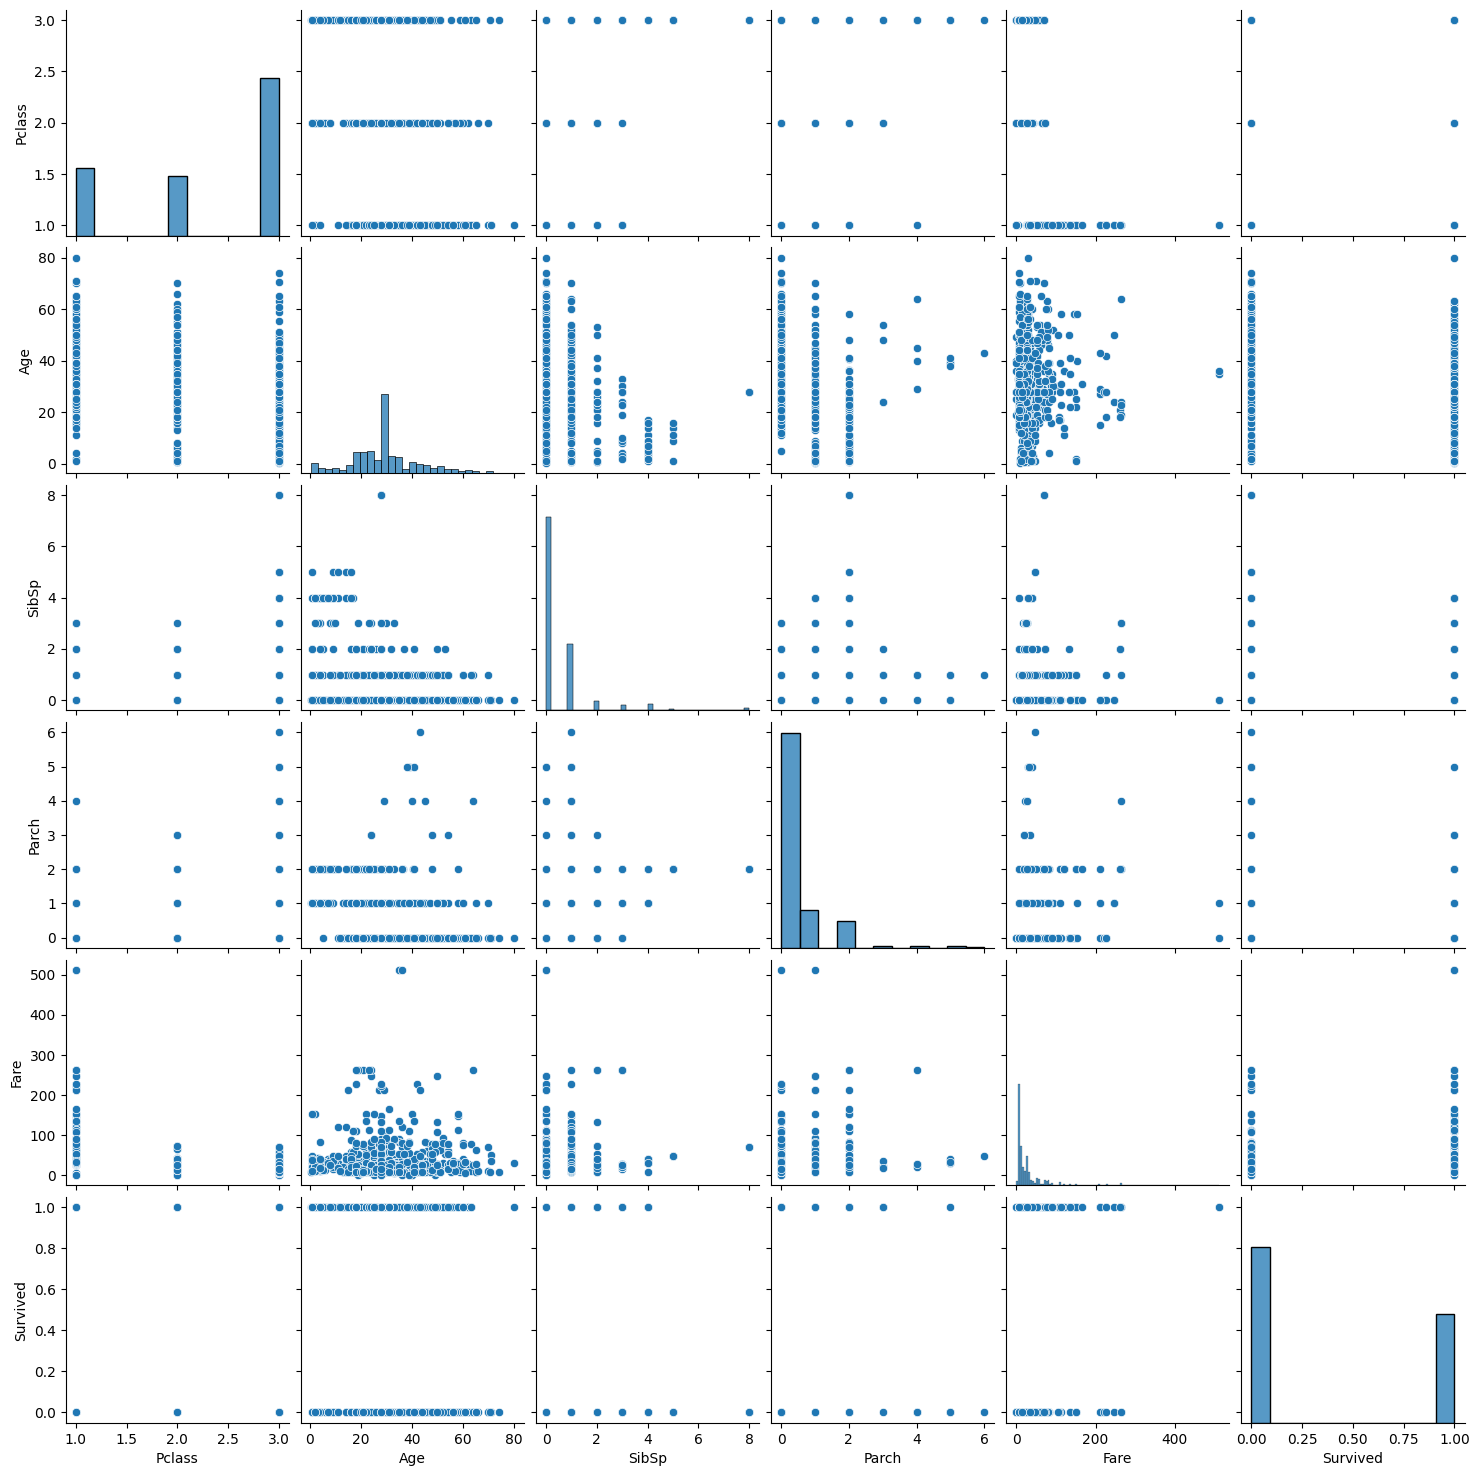

In [32]:
polting=data_train.copy()
polting=polting.join(data_train_y)
sns.pairplot(polting)



 <center><strong>The difference between cut & qcut</strong></center>
<center><img src="images/qcut&cut.png"/></center>

In [33]:
# creating : new fetures using feature engineering 

from sklearn.preprocessing import KBinsDiscretizer  

full_data=[data_train,data_test]
KBinsAge = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
KBinsAge.fit(data_train[['Age']])
KBinsFare = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
KBinsFare.fit(data_train[['Fare']])

for df in full_data:
    df['#Family']= df['SibSp']+df['Parch']
    df['Alone']=1
    df.loc[df['#Family'] > 0, 'Alone'] = 0
    df['FareBin'] = KBinsFare.transform(df[['Fare']])
    df['AgeBin'] = KBinsAge.transform(df[['Age']])

data_train.info()
data_test.info()
print('-'*40)
data_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 36 to 484
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    800 non-null    int64  
 1   Sex       800 non-null    object 
 2   Age       800 non-null    float64
 3   SibSp     800 non-null    int64  
 4   Parch     800 non-null    int64  
 5   Fare      800 non-null    float64
 6   Embarked  800 non-null    object 
 7   #Family   800 non-null    int64  
 8   Alone     800 non-null    int64  
 9   FareBin   800 non-null    float64
 10  AgeBin    800 non-null    float64
dtypes: float64(4), int64(5), object(2)
memory usage: 107.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 514 to 848
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    89 non-null     int64  
 1   Sex       89 non-null     object 
 2   Age       89 non-null     float64
 3   SibSp     89 non-null     i

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,#Family,Alone,FareBin,AgeBin
36,3,male,28.0,0,0,7.2292,C,0,1,0.0,1.0
75,3,male,25.0,0,0,7.6500,S,0,1,0.0,1.0
737,1,male,35.0,0,0,512.3292,C,0,1,3.0,2.0
294,3,male,24.0,0,0,7.8958,S,0,1,0.0,1.0
298,1,male,28.0,0,0,30.5000,S,0,1,0.0,1.0


In [34]:
# Converting : Using  LabelEncoder & OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelEmbarked = LabelEncoder()
labelFare = LabelEncoder()
oneHotSex = OneHotEncoder(sparse_output=False)
oneHotAge = OneHotEncoder(sparse_output=False)
################Train Set#############
data_train['Embarked']=data_train['Embarked'].astype("string")
Sex_coded=oneHotSex.fit_transform(data_train[['Sex']])
data_train['Male']=Sex_coded[:,1]
data_train['Female']=Sex_coded[:,0]
data_train['Embarked_Code'] = labelEmbarked.fit_transform(data_train['Embarked'])
Age_coded=oneHotAge.fit_transform(data_train[['AgeBin']])
for i in range(Age_coded.shape[1]):
    data_train['Age_{}'.format(i)]=Age_coded[:,i]
data_train['FareBin_Code'] = labelFare.fit_transform(data_train['FareBin'])

##########Test Set###############
data_test['Embarked']=data_test['Embarked'].astype("string")

Sex_coded=oneHotSex.transform(data_test[['Sex']])
data_test['Male']=Sex_coded[:,1]
data_test['Female']=Sex_coded[:,0]
data_test['Embarked_Code'] = labelEmbarked.transform(data_test['Embarked'])
Age_coded=oneHotAge.transform(data_test[['AgeBin']])
for i in range(Age_coded.shape[1]):
    data_test['Age_{}'.format(i)]=Age_coded[:,i]
data_test['FareBin_Code'] = labelFare.transform(data_test['FareBin'])
data_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,#Family,Alone,FareBin,AgeBin,Male,Female,Embarked_Code,Age_0,Age_1,Age_2,Age_3,Age_4,FareBin_Code
36,3,male,28.0,0,0,7.2292,C,0,1,0.0,1.0,1.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0
75,3,male,25.0,0,0,7.6500,S,0,1,0.0,1.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0
737,1,male,35.0,0,0,512.3292,C,0,1,3.0,2.0,1.0,0.0,0,0.0,0.0,1.0,0.0,0.0,3
294,3,male,24.0,0,0,7.8958,S,0,1,0.0,1.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0
298,1,male,28.0,0,0,30.5000,S,0,1,0.0,1.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0


In [35]:

print(data_train.groupby('FareBin_Code').size())
#### since most of Fare bins are in the first class so we don't have much data for all ohter classes 
data_train.drop(['FareBin_Code'],axis=1,inplace=True)
data_test.drop(['FareBin_Code'],axis=1,inplace=True)

FareBin_Code
0    768
1     24
2      6
3      2
dtype: int64


### Feature Scaling

In [36]:
#Delete Unwanted cols
drop_column=['Sex','AgeBin','Fare','Age','SibSp','Parch','Embarked']
data_train.drop(drop_column,axis=1,inplace=True)
data_test.drop(drop_column,axis=1,inplace=True)
data_train

,Pclass,#Family,Alone,FareBin,Male,Female,Embarked_Code,Age_0,Age_1,Age_2,Age_3,Age_4
36,3,0,1,0.0,1.0,0.0,0,0.0,1.0,0.0,0.0,0.0
75,3,0,1,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0
737,1,0,1,3.0,1.0,0.0,0,0.0,0.0,1.0,0.0,0.0
294,3,0,1,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0
298,1,0,1,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
107,3,0,1,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0
237,2,2,0,0.0,0.0,1.0,2,1.0,0.0,0.0,0.0,0.0
846,3,10,0,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0
364,3,1,0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0


In [37]:
data_test

,Pclass,#Family,Alone,FareBin,Male,Female,Embarked_Code,Age_0,Age_1,Age_2,Age_3,Age_4
514,3,0,1,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0
209,1,0,1,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,0.0
245,1,2,0,0.0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0
879,1,1,0,0.0,0.0,1.0,0,0.0,0.0,0.0,1.0,0.0
270,1,0,1,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
453,1,1,0,0.0,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0
330,3,2,0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0
434,1,1,0,0.0,1.0,0.0,2,0.0,0.0,0.0,1.0,0.0
325,1,0,1,1.0,0.0,1.0,0,0.0,0.0,1.0,0.0,0.0


In [38]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
cols=data_train.columns
data_train=scalar.fit_transform(data_train)
data_test=scalar.transform(data_test)

data_train=pd.DataFrame(data_train,columns=cols)
data_test=pd.DataFrame(data_test,columns=cols)

In [39]:
data_train.describe()

,Pclass,#Family,Alone,FareBin,Male,Female,Embarked_Code,Age_0,Age_1,Age_2,Age_3,Age_4
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,5.329071e-17,-6.217249e-17,3.108624e-17,7.771561e-18,-5.329071e-17,-8.881784e-17,-2.331468e-17,7.993606e-17,-1.887379e-17,-6.217249e-17,5.995204e-17,6.661338e-18
std,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00
min,-1.582186e+00,-5.680773e-01,-1.224745e+00,-1.859135e-01,-1.359035e+00,-7.358164e-01,-1.960081e+00,-3.692745e-01,-1.196499e+00,-5.019524e-01,-2.873047e-01,-1.180750e-01
25%,-3.790027e-01,-5.680773e-01,-1.224745e+00,-1.859135e-01,-1.359035e+00,-7.358164e-01,-6.883334e-01,-3.692745e-01,-1.196499e+00,-5.019524e-01,-2.873047e-01,-1.180750e-01
50%,8.241804e-01,-5.680773e-01,8.164966e-01,-1.859135e-01,7.358164e-01,-7.358164e-01,5.834142e-01,-3.692745e-01,8.357714e-01,-5.019524e-01,-2.873047e-01,-1.180750e-01
75%,8.241804e-01,4.275851e-02,8.164966e-01,-1.859135e-01,7.358164e-01,1.359035e+00,5.834142e-01,-3.692745e-01,8.357714e-01,-5.019524e-01,-2.873047e-01,-1.180750e-01
max,8.241804e-01,5.540281e+00,8.164966e-01,1.043772e+01,7.358164e-01,1.359035e+00,5.834142e-01,2.708013e+00,8.357714e-01,1.992221e+00,3.480626e+00,8.469196e+00


## Model Selection 

In [40]:
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score

In [41]:
## Classifier 
clf = svm.SVC(kernel='rbf',gamma=0.5,C=30.0)
kfold= KFold(n_splits=5)
score = cross_val_score(clf,data_train,data_train_y,cv=kfold)
print(score)

[0.78125 0.825   0.8375  0.8     0.75625]


In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              
              'kernel': ['linear']}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1,cv=kfold)
grid.fit(data_train,data_train_y)
print(grid.best_params_) 
grid_predictions = grid.predict(data_test) 
   


Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 10, 'gamma': 1, 'kernel': 'linear'}


In [43]:
from sklearn.metrics import classification_report
print(classification_report(data_test_y, grid_predictions))


              precision    recall  f1-score   support

           0       0.84      0.89      0.87        55
           1       0.81      0.74      0.77        34

    accuracy                           0.83        89
   macro avg       0.83      0.81      0.82        89
weighted avg       0.83      0.83      0.83        89



In [44]:
from sklearn.linear_model import LogisticRegression
param_grid={}
grid1 = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1,cv=kfold)
grid1.fit(data_train,data_train_y)
print(grid.best_params_) 
grid_predictions1 = grid1.predict(data_test) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 10, 'gamma': 1, 'kernel': 'linear'}


In [45]:
print(classification_report(data_test_y, grid_predictions1))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        55
           1       0.76      0.74      0.75        34

    accuracy                           0.81        89
   macro avg       0.80      0.79      0.80        89
weighted avg       0.81      0.81      0.81        89

